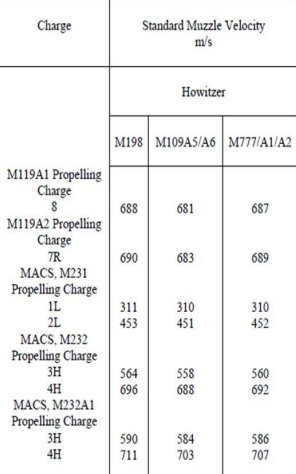

In [1]:
from IPython.display import Image
Image("C:/Users/Jim/Pictures/Screenshots/Velocity.png")

In [ ]:
import math

# formuala for maxiumum ballistic range creaetd by KurtHeckman https://www.vcalc.com/wiki/ballistic-range
# Confirmed by CPT Torres
def compute_x(v, theta_deg, h, g=9.81):
    theta = math.radians(theta_deg)
    term = (v * math.sin(theta))**2 + (2 * g * h)
    t = (v * math.sin(theta) + math.sqrt(term)) / g
    x = t * math.cos(theta) * v
    return x
    
#MGRS issue. 8 digits grd system by hand
#https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da
def apply_offset_to_grid(start_grid, azimuth_deg, distance):
    if len(start_grid) == 8:       
        easting = int(start_grid[:4])
        northing = int(start_grid[4:])
#https://stackoverflow.com/questions/28472496/difficulties-with-ra-dec-and-alt-azi-conversions-with-pyephem
#Radians and degrees
    az = math.radians(azimuth_deg)
    delta_e = distance * math.sin(az)
    delta_n = distance * math.cos(az)
    new_e = int(round(easting + delta_e))
    new_n = int(round(northing + delta_n))
    new_grid = f"{new_e:04d}{new_n:04d}"
    return new_grid
    
g = 9.81

v = float(input("Enter velocity (m/s): "))
theta = float(input("Enter launch angle: "))
h = float(input("Enter height difference: "))
start_grid = input("8 digit Grid coordinate: ")
direction = float(input("Enter direction of fire (azimuth degrees): "))

# Compute horizontal distance
x = compute_x(v, theta, h, g)

# Compute final grid
final_grid = apply_offset_to_grid(start_grid, direction, x)

print(f"\nImpact Distance: {x:.2f} meters")
print(f"Final 8-Digit Grid Coordinate: {final_grid}")